In [ ]:
# colab 사용시 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,473 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144618 files and d

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# colab 사용시 drive mounting

from google.colab import drive
drive.mount('/content/gdrive/')

In [6]:
# colab 사용시 import

df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/pop_day.csv',index_col=0)

In [2]:
# 파일로 import 

df=pd.read_csv('datasets/pop_day.csv',index_col=0)

In [ ]:
diff1=df.diff(periods=1)[1:]

In [ ]:
diff1.head()

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2010-02,-4.0,-4.0,-65.0,-88.0,-46.0,-93.0,71.0,-110.0,-73.0,-88.0,-124.0,102.0,-50.0,-172.0,-78.0,-160.0,-89.0,-75.0,-63.0,-31.0,-154.0,13.0,71.0,9.0,72.0
2010-03,-44.0,-19.0,-55.0,-61.0,-82.0,23.0,2.0,-60.0,-87.0,-90.0,-167.0,9.0,-9.0,-126.0,-126.0,-176.0,-113.0,-88.0,-183.0,-147.0,-96.0,10.0,-20.0,-59.0,-16.0
2010-04,16.0,-22.0,-93.0,-3.0,-102.0,46.0,-122.0,-142.0,-47.0,-84.0,-133.0,2.0,-92.0,-86.0,-66.0,-105.0,-62.0,-62.0,-70.0,-32.0,-102.0,89.0,82.0,10.0,52.0
2010-05,-40.0,3.0,-52.0,-82.0,-22.0,-45.0,-137.0,2.0,-115.0,-79.0,-133.0,-34.0,-29.0,-21.0,-60.0,-138.0,-1.0,-38.0,-62.0,-33.0,-90.0,82.0,-36.0,1.0,12.0
2010-06,6.0,-39.0,23.0,-48.0,-5.0,-66.0,-57.0,-48.0,198.0,-65.0,-120.0,83.0,-42.0,-75.0,-71.0,-120.0,56.0,-19.0,-26.0,4.0,-122.0,72.0,-7.0,-15.0,14.0


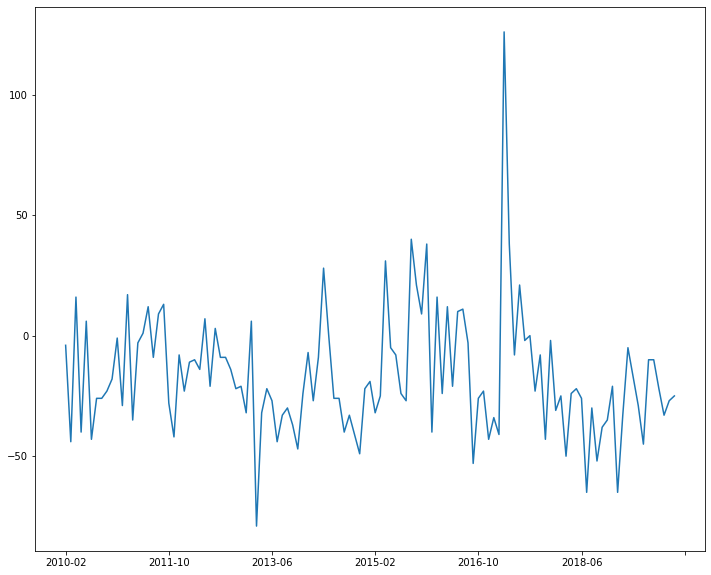

In [ ]:
diff1.iloc[:,0].plot(figsize=(12,10))

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

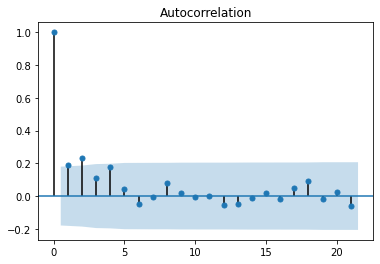

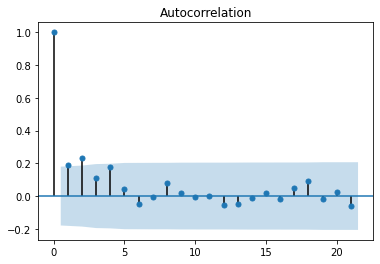

In [ ]:
plot_acf(diff1.iloc[:,0])

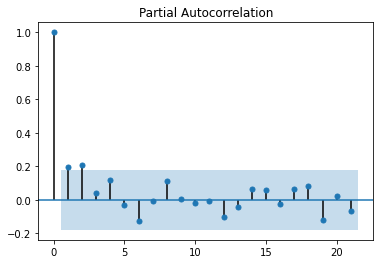

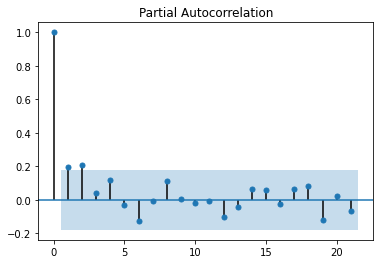

In [ ]:
plot_pacf(diff1.iloc[:,0])

In [ ]:
diff2=df.diff(2)[2:]

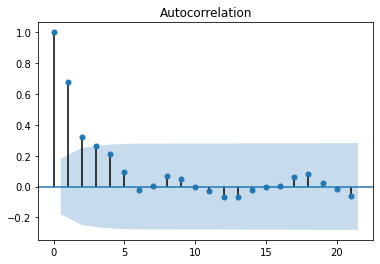

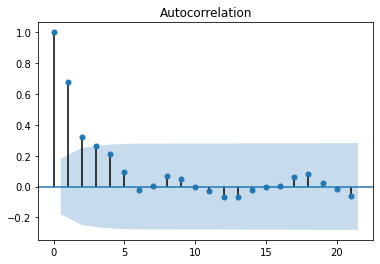

In [ ]:
plot_acf(diff2.iloc[:,0])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.iloc[:,0], order=(0,2,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D2.종로구   No. Observations:                  118
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -550.788
Method:                       css-mle   S.D. of innovations             25.630
Date:                Tue, 06 Oct 2020   AIC                           1105.576
Time:                        03:34:24   BIC                           1111.118
Sample:                    03-01-2010   HQIC                          1107.826
                         - 12-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ma.L1.D2.종로구    -0.8320      0.078    -10.718      0.000      -0.984      -0.680
                                    Roots                                    
                  Real          Imaginary      

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.forecast(steps=100)

(array([4391.09353587, 4365.18707174, 4339.28060761, 4313.37414348,
        4287.46767935, 4261.56121522, 4235.65475109, 4209.74828696,
        4183.84182283, 4157.9353587 , 4132.02889457, 4106.12243044,
        4080.21596631, 4054.30950219, 4028.40303806, 4002.49657393,
        3976.5901098 , 3950.68364567, 3924.77718154, 3898.87071741,
        3872.96425328, 3847.05778915, 3821.15132502, 3795.24486089,
        3769.33839676, 3743.43193263, 3717.5254685 , 3691.61900437,
        3665.71254024, 3639.80607611, 3613.89961198, 3587.99314785,
        3562.08668372, 3536.18021959, 3510.27375546, 3484.36729133,
        3458.4608272 , 3432.55436307, 3406.64789894, 3380.74143481,
        3354.83497069, 3328.92850656, 3303.02204243, 3277.1155783 ,
        3251.20911417, 3225.30265004, 3199.39618591, 3173.48972178,
        3147.58325765, 3121.67679352, 3095.77032939, 3069.86386526,
        3043.95740113, 3018.050937  , 2992.14447287, 2966.23800874,
        2940.33154461, 2914.42508048, 2888.51861

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text

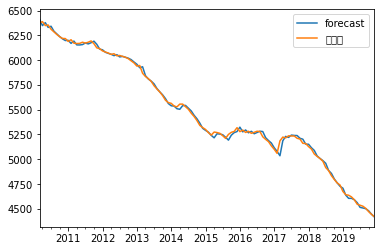

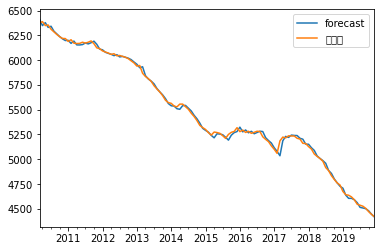

In [ ]:
model_fit.plot_predict()

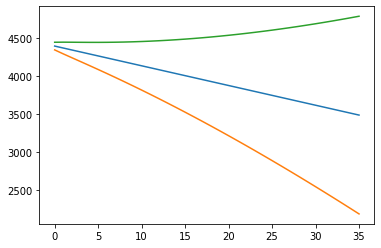

In [ ]:
plt.plot(model_fit.forecast(steps=36)[0])
plt.plot(model_fit.forecast(steps=36)[2])

In [ ]:
model_fit.forecast(steps=36)[0]

array([4391.09353587, 4365.18707174, 4339.28060761, 4313.37414348,
       4287.46767935, 4261.56121522, 4235.65475109, 4209.74828696,
       4183.84182283, 4157.9353587 , 4132.02889457, 4106.12243044,
       4080.21596631, 4054.30950219, 4028.40303806, 4002.49657393,
       3976.5901098 , 3950.68364567, 3924.77718154, 3898.87071741,
       3872.96425328, 3847.05778915, 3821.15132502, 3795.24486089,
       3769.33839676, 3743.43193263, 3717.5254685 , 3691.61900437,
       3665.71254024, 3639.80607611, 3613.89961198, 3587.99314785,
       3562.08668372, 3536.18021959, 3510.27375546, 3484.36729133])

In [ ]:
model_fit.forecast(steps=)

In [3]:
df1=pd.read_csv('datasets/itg_table_euc_kr.csv',encoding='euc-kr',index_col=0)

In [ ]:
df1.head()

,date,gu,baby,어린이집_정원률,어린이집_현원,어린이집_정원,평당매매/타입1,평당매매/타입2,평당매매/타입3,평당매매/타입4,평당보증금,평당월세
0,2016-09,종로구,5225.0,0.793885,3921.0,4939.0,666.925,666.925,666.925,666.925,433.257895,0.352632
1,2016-09,중구,5126.0,0.842245,3481.0,4133.0,636.025,636.025,636.025,636.025,337.854348,0.668478
2,2016-09,용산구,10108.0,0.888597,4730.0,5323.0,829.275,829.275,829.275,829.275,353.585185,0.705556
3,2016-09,성동구,14735.0,0.865920,6962.0,8040.0,626.850,626.850,626.850,626.850,235.057971,0.606522
4,2016-09,광진구,15443.0,0.860475,7709.0,8959.0,592.500,592.500,592.500,592.500,286.766667,0.282576


In [ ]:
df1.groupby(['date','gu'])['어린이집_정원률'].sum().unstack().plot(figsize=(15,12))

In [4]:
# 모델용 데이터 전처리
kg_df=pd.read_csv('datasets/유치원db_raw.csv',encoding='euc-kr',index_col=0)

In [8]:
kg_df=kg_df[['sigungu','ty_pe','name','lng','lon','sqm','rooms','no_capa','no_enroll','s_d','ops_day']]

In [9]:
kg_df['s_d']=kg_df['s_d'].apply(lambda x : '-'.join(x.split('-')[:-1]))
kg_df['ops_day']=kg_df['ops_day'].apply(lambda x : '-'.join(x.split('-')[:-1]))

In [5]:
pop_geo=pd.read_csv('datasets/pop_geo.csv',encoding='euc-kr')

In [11]:
dong=pop_geo.iloc[:,-4:]
dong=dong[['gu','dong','위도','경도']]

In [12]:
!pip install haversine

In [13]:
from haversine import haversine

In [14]:
dist=[]
for i in range(len(kg_df)):
  temp=[]
  gu_df=dong[dong['gu']==kg_df['sigungu'][i]]
  for j in range(len(gu_df)):
    temp.append([gu_df.iloc[j,1],haversine(kg_df.iloc[i,3:5],gu_df.iloc[j,2:],unit='km')])
  dist.append(temp)
  print(i)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
276359
276360
276361
276362
276363
276364
276365
276366
276367
276368
276369
276370
276371
276372
276373
276374
276375
276376
276377
276378
276379
276380
276381
276382
276383
276384
276385
276386
276387
276388
276389
276390
276391
276392
276393
276394
276395
276396
276397
276398
276399
276400
276401
276402
276403
276404
276405
276406
276407
276408
276409
276410
276411
276412
276413
276414
276415
276416
276417
276418
276419
276420
276421
276422
276423
276424
276425
276426
276427
276428
276429
276430
276431
276432
276433
276434
276435
276436
276437
276438
276439
276440
276441
276442
276443
276444
276445
276446
276447
276448
276449
276450
276451
276452
276453
276454
276455
276456
276457
276458
276459
276460
276461
276462
276463
276464
276465
276466
276467
276468
276469
276470
276471
276472
276473
276474
276475
276476
276477
276478
276479
276480
276481
276482
276483
276484
276485
276486
276487
276488
276489
276490
276491
276492
276493
276494
276495
27649

In [17]:
# take second element for sort
def takeSecond(elem):
    return elem[1]

In [18]:
dist_sort=[]
for i in range(len(dist)):
  dist_sort.append(sorted(dist[i],key=takeSecond)[:3])

In [19]:
raw=[]
for kg in dist_sort:
  temp=[]
  for i in kg:
    temp.extend(i)
  raw.append(temp)

In [20]:
dist_df=pd.DataFrame(raw,columns=['gu1','dist1','gu2','dsit2','gu3','dist3'])

In [21]:
raw_data=pd.concat([kg_df,dist_df],axis=1)

In [6]:
raw_data.to_csv('datasets/geo/raw_data.csv',encoding='euc-kr')

NameError: name 'raw_data' is not defined

In [25]:
raw_data['enroll_rate']=raw_data['no_enroll']/raw_data['no_capa']

In [27]:
raw_data.head()

,sigungu,ty_pe,name,lng,lon,sqm,rooms,no_capa,no_enroll,s_d,ops_day,gu1,dist1,gu2,dsit2,gu3,dist3,enroll_rate
0,종로구,민간,이화어린이집,37.489,127.038,248,6,64,61,2004-05,2016-09,창신제1동,9.605314,숭인제2동,9.692483,종로5.6가동,9.826732,0.953125
1,종로구,국공립,삼청어린이집,37.584,126.980,68,3,32,32,1999-09,2016-09,삼청동,0.265109,가회동,0.556807,청운효자동,0.968844,1.000000
2,종로구,사회복지법인,창신어린이집,37.574,127.012,300,4,77,48,1978-12,2016-09,창신제1동,0.210322,창신제2동,0.259840,창신제3동,0.541755,0.623377
3,종로구,국공립,아동회관어린이집,37.578,127.012,215,6,96,71,1988-10,2016-09,창신제3동,0.125480,창신제2동,0.264404,숭인제1동,0.435879,0.739583
4,종로구,국공립,부암어린이집,37.602,126.963,188,5,89,80,1998-07,2016-09,부암동,0.735563,평창동,1.388046,청운효자동,1.989912,0.898876


In [28]:
pop_geo.index=pop_geo['dong']
pop_geo=pop_geo.iloc[:,:-4]

In [34]:
pop_geo

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
dong,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
개포1동,709,719,726,712,713,726,734,714,729,727,733,740,744,747,764,758,753,761,763,771,771,746,753,743,753,745,737,751,756,753,746,751,745,745,742,741,748,754,757,761,...,681,687,689,689,688,692,679,677,668,648,640,650,641,626,619,604,586,556,527,488,419,362,311,279,263,246,230,211,196,191,184,186,177,177,177,179,173,165,163,168
개포2동,1845,1820,1802,1831,1832,1849,1851,1842,1847,1859,1855,1862,1893,1897,1876,1848,1847,1841,1848,1845,1855,1840,1855,1874,1875,1882,1884,1879,1877,1883,1867,1858,1852,1852,1854,1857,1859,1825,1816,1813,...,872,823,769,714,687,646,628,616,593,578,555,544,521,492,460,442,434,426,423,423,421,415,412,407,395,398,388,388,388,432,507,612,667,694,698,723,779,848,876,894
개포4동,1041,1039,1041,1036,1034,1025,1023,1020,1037,1042,1048,1054,1061,1067,1069,1072,1059,1055,1057,1055,1067,1072,1066,1073,1078,1074,1072,1063,1052,1055,1056,1057,1057,1053,1052,1060,1063,1056,1061,1052,...,809,807,789,779,768,758,763,763,764,749,750,727,723,719,722,715,719,721,729,726,737,747,740,745,741,737,730,741,729,719,711,699,704,707,705,689,684,672,658,651
논현1동,894,904,921,938,923,912,924,920,922,924,928,936,942,942,928,911,914,918,929,924,920,927,921,935,921,905,907,907,901,893,908,911,915,930,933,930,921,927,912,912,...,716,716,701,698,694,681,678,662,663,656,652,646,636,633,627,630,616,607,597,602,600,594,584,580,570,569,559,556,552,545,531,514,508,504,499,486,484,487,480,483
논현2동,1045,1050,1047,1054,1073,1079,1078,1092,1089,1078,1076,1096,1092,1085,1080,1085,1088,1088,1083,1086,1097,1102,1087,1083,1083,1080,1092,1095,1095,1099,1093,1087,1086,1073,1062,1059,1050,1048,1046,1041,...,1039,1028,1018,1015,991,995,998,984,982,979,969,970,948,951,955,947,938,935,930,923,913,918,904,900,879,870,864,850,825,814,796,789,778,779,770,765,760,749,740,738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
상봉제2동,831,820,825,826,794,788,790,791,789,775,771,773,760,756,752,747,745,754,767,766,762,760,765,768,770,753,758,752,760,767,762,746,740,733,724,724,718,721,699,704,...,686,695,684,686,694,694,686,674,672,681,665,660,667,660,644,632,625,628,622,626,630,625,630,636,633,627,622,621,608,611,606,609,602,603,591,577,583,584,573,582
신내1동,1601,1759,1851,1888,1919,1931,1935,1944,1937,1940,1932,1915,1925,1945,1954,1960,1963,1981,1963,1957,1957,1973,1969,1974,2001,1996,1992,1997,2013,1999,2004,2003,1981,1975,1968,1965,1926,1925,1909,1918,...,2820,2794,2781,2767,2727,2703,2670,2672,2689,2637,2621,2602,2582,2539,2507,2471,2421,2374,2361,2331,2309,2281,2261,2229,2206,2179,2160,2151,2122,2102,2094,2068,2039,2002,1980,1943,1920,1889,1861,1840
신내2동,1543,1522,1528,1512,1497,1508,1477,1469,1479,1475,1456,1459,1458,1441,1441,1434,1421,1420,1423,1427,1421,1421,1442,1469,1468,1464,1459,1444,1434,1433,1428,1418,1406,1416,1400,1397,1368,1364,1351,1353,...,1156,1144,1140,1140,1127,1127,1116,1112,1123,1119,1119,1117,1106,1096,1074,1051,1040,1027,1012,1001,1006,994,985,976,972,964,956,967,971,973,957,960,952,954,946,938,922,905,895,882


In [49]:
pop1=[]
pop2=[]
pop3=[]
import numpy as np
for i in range(len(raw_data)):
  try:
    pop1.append(pop_geo.loc[raw_data.iloc[i,11],raw_data.iloc[i,10]])
    pop2.append(pop_geo.loc[raw_data.iloc[i,13],raw_data.iloc[i,10]])
    pop3.append(pop_geo.loc[raw_data.iloc[i,15],raw_data.iloc[i,10]])
    print(i)
  except:
    pop1.append(np.nan)
    pop2.append(np.nan)
    pop3.append(np.nan)
    print(i, 'error')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
276359 error
276360 error
276361 error
276362 error
276363 error
276364 error
276365 error
276366 error
276367 error
276368 error
276369 error
276370 error
276371 error
276372 error
276373 error
276374 error
276375 error
276376 error
276377 error
276378 error
276379 error
276380 error
276381 error
276382 error
276383 error
276384 error
276385 error
276386 error
276387 error
276388 error
276389 error
276390 error
276391 error
276392 error
276393 error
276394 error
276395 error
276396 error
276397 error
276398 error
276399 error
276400 error
276401 error
276402 error
276403 error
276404 error
276405 error
276406 error
276407 error
276408 error
276409 error
276410 error
276411 error
276412 error
276413 error
276414 error
276415 error
276416 error
276417 error
276418 error
276419 error
276420 error
276421 error
276422 error
276423 error
276424 error
276425 error
276426 error
276427 error
276428 error
276429 error
276430 error
276431 error
276432 error
27

In [50]:
raw_data['pop1']=pop1
raw_data['pop2']=pop2
raw_data['pop3']=pop3
raw_data.head(3)

,sigungu,ty_pe,name,lng,lon,sqm,rooms,no_capa,no_enroll,s_d,ops_day,gu1,dist1,gu2,dsit2,gu3,dist3,enroll_rate,pop1,pop2,pop3
0,종로구,민간,이화어린이집,37.489,127.038,248,6,64,61,2004-05,2016-09,창신제1동,9.605314,숭인제2동,9.692483,종로5.6가동,9.826732,0.953125,134,264,87
1,종로구,국공립,삼청어린이집,37.584,126.980,68,3,32,32,1999-09,2016-09,삼청동,0.265109,가회동,0.556807,청운효자동,0.968844,1.000000,86,145,614
2,종로구,사회복지법인,창신어린이집,37.574,127.012,300,4,77,48,1978-12,2016-09,창신제1동,0.210322,창신제2동,0.259840,창신제3동,0.541755,0.623377,134,241,308


In [6]:
raw_data=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/geo/raw_data.csv',encoding='euc-kr',index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
 raw_data.dropna(inplace=True)

In [8]:
raw_data.drop(raw_data[raw_data['dist1']>100].index,inplace=True)

In [9]:
raw_data.reset_index(inplace=True,drop=True)

In [10]:
idx=[]
for i in range(len(raw_data)):
  if len(raw_data.iloc[i,-3])>5:
    idx.append(i)
  elif len(raw_data.iloc[i,-2])>5:
    idx.append(i)
  elif len(raw_data.iloc[i,-1])>5:
    idx.append(i)

In [13]:
idx=[]
import numpy as np
for i in range(len(raw_data)):
  if type(raw_data.iloc[i,-3])!=np.int64:
    idx.append(i)
  elif type(raw_data.iloc[i,-2])!=np.int64:
    idx.append(i)
  elif type(raw_data.iloc[i,-1])!=np.int64:
    idx.append(i)

In [11]:
raw_data.drop(idx,inplace=True)

In [12]:
dummy=pd.get_dummies(raw_data['ty_pe'])

In [13]:
X_data=pd.concat([dummy,raw_data[['dist1','dsit2','dist3','pop1','pop2','pop3']]],axis=1)
y_data=raw_data['enroll_rate']

In [14]:
X_data=X_data.astype(float)
y_data=y_data.astype(float)
X_data.reset_index(inplace=True,drop=True)
y_data.reset_index(inplace=True,drop=True)

In [15]:
X_data

,가정,국공립,민간,법인·단체등,사회복지법인,직장,협동,dist1,dsit2,dist3,pop1,pop2,pop3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.605314,9.692483,9.826732,134.0,264.0,87.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.265109,0.556807,0.968844,86.0,145.0,614.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.210322,0.259840,0.541755,134.0,241.0,308.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.125480,0.264404,0.435879,308.0,241.0,290.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.735563,1.388046,1.989912,359.0,734.0,614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.496342,0.942484,1.058747,1263.0,1410.0,472.0
222730,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.823596,12.937100,13.656477,818.0,1213.0,949.0
222731,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.823596,12.937100,13.656477,818.0,1213.0,949.0
222732,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.806477,0.952920,0.967817,363.0,1173.0,1230.0


In [16]:
y_data

0         0.953125
1         1.000000
2         0.623377
3         0.739583
4         0.898876
            ...   
222729    0.894737
222730    0.895833
222731    0.838710
222732    0.797872
222733    0.950000
Name: enroll_rate, Length: 222734, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr=LinearRegression()

In [62]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_pred=lr.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mean_squared_error(y_pred,y_test)

0.043002128517376594

In [66]:
lr.coef_

array([ 1.04451885e-02,  7.02455914e-02, -2.09779946e-04,  7.60564691e-03,
        4.09891153e-03, -9.89264639e-02,  6.74090539e-03,  4.73518406e-03,
       -9.58156268e-03,  4.18233932e-03,  2.11132010e-05,  4.51004204e-06,
        9.10626632e-06])

In [52]:
!pip install statsmodels

In [20]:
from statsmodels.regression.linear_model import OLS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [74]:
model=OLS(endog=y_train,exog=X_train)

In [75]:
fitted_model=model.fit()

In [77]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:            enroll_rate   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     507.7
Date:                Wed, 07 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:07:57   Log-Likelihood:                 26043.
No. Observations:              167050   AIC:                        -5.206e+04
Df Residuals:                  167037   BIC:                        -5.193e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
가정             0.7871      0.002    411.096      0.0

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()
partial_sc_X_data=sc.fit_transform(X_data.iloc[:,-6:])

In [19]:
sc_X_data=pd.concat([X_data.iloc[:,:7],pd.DataFrame(partial_sc_X_data)],axis=1)

In [66]:
sc_X_data

,가정,국공립,민간,법인·단체등,사회복지법인,직장,협동,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.882733,0.832270,0.813232,-1.704374,-1.550489,-1.829653
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.590417,-0.603854,-0.583702,-1.780467,-1.782399,-0.806170
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.599058,-0.650537,-0.651056,-1.704374,-1.595312,-1.400451
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.612439,-0.649820,-0.667754,-1.428537,-1.595312,-1.435409
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.516216,-0.473184,-0.422675,-1.347688,-0.634539,-0.806170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.553946,-0.543226,-0.569524,0.085396,0.682870,-1.081948
222730,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.390325,1.342323,1.417202,-0.620049,0.298950,-0.155569
222731,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.390325,1.342323,1.417202,-0.620049,0.298950,-0.155569
222732,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.505031,-0.541585,-0.583864,-1.341347,0.220997,0.390159


In [22]:
from sklearn.model_selection import train_test_split
sc_X_train,sc_X_test,sc_y_train,sc_y_test=train_test_split(sc_X_data,y_data)

In [68]:
sc_model=OLS(exog=sc_X_data,endog=y_data)
fitted_sc_model=sc_model.fit()

In [69]:
print(fitted_sc_model.summary())

                            OLS Regression Results                            
Dep. Variable:            enroll_rate   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     674.7
Date:                Wed, 07 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:23:13   Log-Likelihood:                 34637.
No. Observations:              222734   AIC:                        -6.925e+04
Df Residuals:                  222721   BIC:                        -6.911e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
가정             0.8239      0.001   1180.604      0.0

In [20]:
from sklearn.linear_model import LogisticRegression

In [26]:
y_data.mean()

0.8298532232098135

In [27]:
pf_y_data=[]
for proba in y_data:
  if proba>y_data.mean():
    pf_y_data.append(1)
  else:
    pf_y_data.append(0)

In [28]:
pf_X_train,pf_X_test,pf_y_train,pf_y_test=train_test_split(sc_X_data,pf_y_data)

In [29]:
log=LogisticRegression()
log.fit(pf_X_train,pf_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
import statsmodels.api as sm 
import pandas as pd  

log_reg = sm.Logit(pf_y_train, pf_X_train).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.621665
         Iterations 5


In [31]:
y_pred=log_reg.pred(pf_X_test)

In [35]:
class_pred = list(map(round, y_pred)) 

In [32]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(class_pred,pf_y_test)

0.6696896774656993

In [39]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               167050
Model:                          Logit   Df Residuals:                   167037
Method:                           MLE   Df Model:                           12
Date:                Wed, 07 Oct 2020   Pseudo R-squ.:                 0.03425
Time:                        08:07:19   Log-Likelihood:            -1.0385e+05
converged:                       True   LL-Null:                   -1.0753e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
가정             0.6468      0.008     78.579      0.000       0.631       0.663
국공립            1.2471      0.012    102.072      0.000       1.223       1.271
민간             0.4504      0.009     48.451      0.0